<a href="https://colab.research.google.com/github/harshbansal7/profarm-dvh/blob/main/Datasets%20and%20Notebooks/Final%20-%20Crop%20Choice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing required Libraries

In [ ]:
import numpy as np
import pandas as pd # to make dataframes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### Importing Dataset 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/harshbansal7/profarm-dvh/main/Datasets%20and%20Notebooks/npk.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### Building Model

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


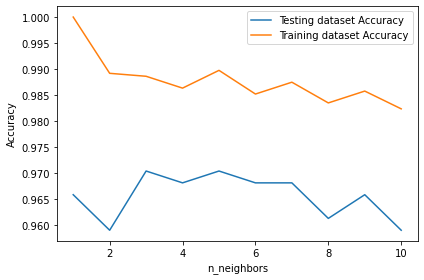

0.9704545454545455

In [ ]:
X = df.drop(columns = 'label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
error_rate = []
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    error_rate.append(np.mean(pred_i != y_test))

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.savefig("Data.png",dpi=300)
plt.show()


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

[0.03409090909090909, 0.04090909090909091, 0.029545454545454545, 0.031818181818181815, 0.029545454545454545, 0.031818181818181815, 0.031818181818181815, 0.038636363636363635, 0.03409090909090909, 0.04090909090909091]


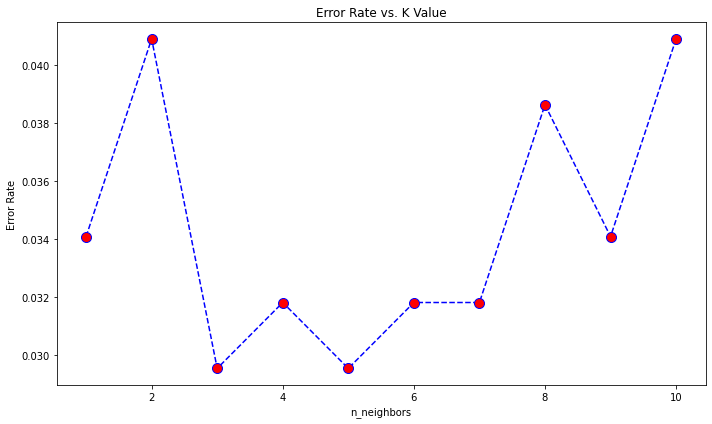

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')
plt.savefig("Data.png",dpi=300)
req_k_value = error_rate.index(min(error_rate))+1

print(error_rate)

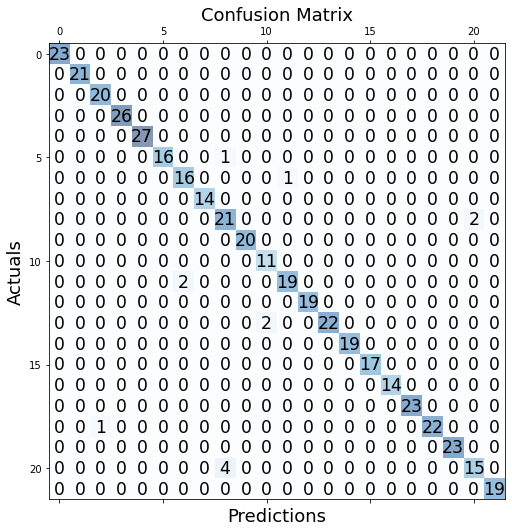

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#
# Get the predictions
#
y_pred = knn.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# clf
# svcModel
# knn
y_pred = knn.predict(X_test)
precision = f1_score(y_test, y_pred, average='weighted')
print(precision)

0.9706356327108521


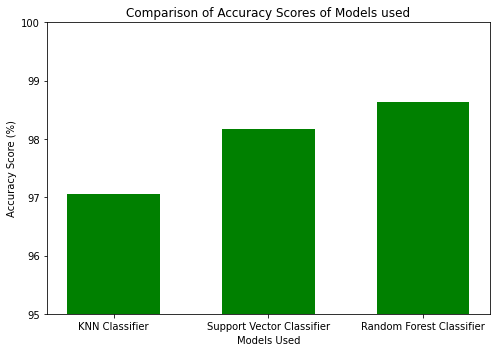

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# creating the dataset
data = {'KNN Classifier':97.063563, 'Support Vector Classifier':98.16328, 'Random Forest Classifier':98.636}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.6)
 
plt.xlabel("Models Used")
plt.ylabel("Accuracy Score (%)")
plt.title("Comparison of Accuracy Scores of Models used")
plt.ylim(95, 100)
plt.savefig("Data.png",dpi=300)

plt.show()

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

svcModel = SVC(kernel='poly', degree=3, random_state = 42)
svcModel.fit(X_train,y_train)
print(svcModel.score(X_test, y_test))

0.9818181818181818


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 10, random_state = 42)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9863636363636363


In [ ]:
def scores_print(name_of_regr, regr, x_test, y_test):
  y_pred = regr.predict(x_test)
  sc = regr.score(x_test, y_test)
  print(name_of_regr + " Score = {:.5f}".format(sc))

In [ ]:
scores_print('SVC Training', svcModel, X_train, y_train)

SVC Training Score = 0.98920


In [ ]:
scores_print('KNN Training', knn, X_train, y_train)

KNN Training Score = 0.98864


In [ ]:
scores_print('RFC Training', clf, X_train, y_train)
scores_print('RFC Training', clf, X_test, y_test)

RFC Training Score = 0.99943
RFC Training Score = 0.98636


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the performance metrics for each model
models = ['KNN', 'SVM', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'F1 Score']
data = [[97.04, 97.21, 97.06],
        [98.18, 98.33, 98.16],
        [98.63, 99.37, 99.31]]
df = pd.DataFrame(data, columns=metrics, index=models)

# Normalize the data to make it easier to compare across metrics
df_norm = df

# Sort the models by their performance on the accuracy metric
df_norm = df_norm.sort_values('Accuracy', ascending=False)

df_norm['Name'] = ['Random Forest', 'SVM', 'KNN']
df_norm['Name'] = df_norm['Name'].astype(str)

df_norm

,Accuracy,Precision,F1 Score,Name
Random Forest,98.63,99.37,99.31,Random Forest
SVM,98.18,98.33,98.16,SVM
KNN,97.04,97.21,97.06,KNN


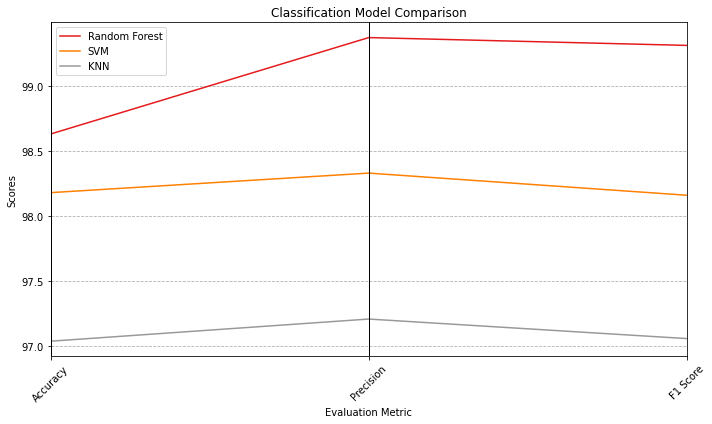

In [ ]:
# Plot the PCP
fig = plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df_norm, class_column='Name', colormap='Set1')
plt.xticks(rotation=45)
plt.xlabel('Evaluation Metric')
plt.ylabel('Scores')
plt.title('Classification Model Comparison')
plt.legend(loc='upper left')
plt.grid(axis='both', which='both', linestyle='--')
plt.savefig('ABC.png', dpi=300)
plt.show()

In [ ]:
df_norm1

NameError: ignored

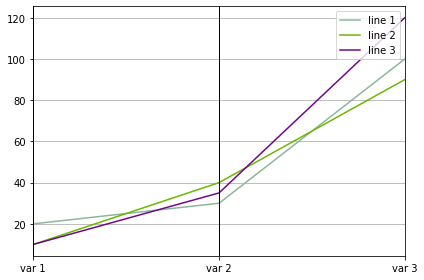

,element,var 1,var 2,var 3
0,line 1,20,30,100
1,line 2,10,40,90
2,line 3,10,35,120


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

df = pd.DataFrame([["line 1",20,30,100],\
    ["line 2",10,40,90],["line 3",10,35,120]],\
    columns=["element","var 1","var 2","var 3"])
parallel_coordinates(df,"element")
plt.show()
df

In [ ]:
# Get the class labels
class_labels = clf.classes_

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

# Set the tick labels for the x and y axes
ax.set_xticklabels(class_labels, rotation=90, fontsize=13)
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticklabels(class_labels, fontsize=13)
ax.set_yticks(np.arange(len(class_labels)))

ax.tick_params(axis="both", direction="in", pad=15)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for Random Forest Classification', fontsize=18, pad=80)
plt.rcParams["figure.autolayout"] = True
plt.savefig("Data.png",dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#
# Get the predictions
#
y_pred = clf.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Visualizing Data

#### Testing Model with some Approximate Data

In [ ]:
alpha = knn.predict([[90, 40, 40.95,20.9,83,6.7,202]])
alpha[0]